# What is Broadcasting?

- Broadcasting is set of rules which allows us to perform binary ufuncs on arrays with different sizes.
- We can use these rules for any binary ufuncs from add, subtract to logaddexp etc.

## 1. Broadcasting Rules
The rules:
1. If shape of arrays do not match, then in attary with less dim pad 1 in left.
2. Then, If shape of arrays doesn't match in any direction, then the 1 in shape is stretched to match with other arrays shape.
3. If shape dim does not match in any array, and there is no 1 also in any shape, then error raises.

Understand with examples.

In [2]:
# Example 1
import numpy as np
M = np.ones((2,3))
M


array([[1., 1., 1.],
       [1., 1., 1.]])

In [3]:
a = np.arange(3)
a

array([0, 1, 2])

In [4]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.]])

How come it resulted in this?
1. Shapes of arrays
   - M.shape = (2,3)
   - a.shape = (3,)
   - apply rule 1, to smaller dim one add 1 to left: a.shape = (1,3)
2. Now shapes of array becomes
   - M.shape = (2,3)
   - a.shape = (1,3)
   - Again, they are not matching, apply rule 2, stretch 1 in a to match M: a.shape = (2,3)

3. Now see, if shapes are same
    - M.shape = (2,3) 
    - a.shape = (2,3)
    - Yes, they have same shape, so now add them.
  ```python
                        M = [[1,1,1],[1,1,1]]
                        
                        a = [[0,1,2], [0,1,2]]
                        
                        M+a = [[1,2,3], [1,2,3]]

In [5]:
# Exmaple 2
a = np.arange(3).reshape((3,1))
a

array([[0],
       [1],
       [2]])

In [6]:
b = np.arange(3)
b

array([0, 1, 2])

In [7]:
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

How come it resulted to this?
1. Apply rule 1:
   - a.shape = (3,1)
   - b.shape = (3,)
   - add 1 to left of b.shape: b.shape = (1,3)

2. Apply rule 2: 
   - Strech shapes of arrays where 1 is there to match with each other.
   - a.shape becomes (3,3)
   - b.shape becomes (3,3)

- Add them

``` python
   a = [[0,0,0], [1,1,1], [2,2,2]]
   b = [[0,1,2], [0,1,2], [0,1,2]]
   a+b = [[0,1,2], [1,2,3], [2,3,4]]

In [8]:
# Example 3 (incompatible arrays)
M = np.ones((3,2))
M

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [9]:
a = np.arange(3)
a

array([0, 1, 2])

M.shape = (3,2)
a.shape = (3,)

rule 1:
- M.shape = (3,2)
- a.shape = (1,3)
  
rule 2:
- M.shape = (3,2)
- a.shape = (3,3)
  
rule 3:
- Shapes of both arrays do not match, it will raise an error.

In [10]:
M+a  # Generate error

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

- Remeber Numpy itself doesnt do such duplication actually, it is for understanding how broadcasting concept works.

## 2. Right side padding
- If we want to pad 1 on right side instead of left side as per rule 1, we will use `np.newaxis`.

In [11]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

# Broadcasting in practice
1. Centering an array
2. Plotting a 2D Function

### (a) Centering an array
- Let's perform centering of an array.
- We have data of 3 features from 10 experiments.
- We want to center the feature values across their mean.

In [12]:
np.random.seed(0)
X = np.random.random((10,3))
X

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276],
       [0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985],
       [0.77815675, 0.87001215, 0.97861834],
       [0.79915856, 0.46147936, 0.78052918],
       [0.11827443, 0.63992102, 0.14335329],
       [0.94466892, 0.52184832, 0.41466194]])

In [13]:
# find columnwise mean i.e. collapse rows i.e. axis=0
x_mean = np.mean(X, axis=0)
x_mean

array([0.52101579, 0.62614181, 0.59620338])

In [14]:
# or we can also find it as:
x_mean = X.mean(0)
x_mean

array([0.52101579, 0.62614181, 0.59620338])

In [15]:
# Center X around mean
# This is a broadcasting operation
# Because shape of X and x_mean are not same

X_centered = X-x_mean
X_centered

array([[ 0.02779771,  0.08904756,  0.00655999],
       [ 0.02386739, -0.20248701,  0.04969073],
       [-0.08342858,  0.26563119,  0.36745938],
       [-0.13757427,  0.16558323, -0.06730846],
       [ 0.04702877,  0.29945483, -0.52516732],
       [-0.43388649, -0.60592341,  0.23641646],
       [ 0.25714096,  0.24387034,  0.38241496],
       [ 0.27814277, -0.16466245,  0.18432579],
       [-0.40274137,  0.01377921, -0.45285009],
       [ 0.42365312, -0.10429349, -0.18154144]])

In [16]:
# Check if they are centered around 0
# Mean should be 0

assert X_centered.mean(0).sum() <0.00000001

# (b) Plotting a 2D function


In [17]:
x = np.linspace(0,5,50)
x.shape  # It's a row of 50 elements

(50,)

In [22]:
y = np.linspace(0,5,50)[:, np.newaxis]
y.shape   # We created a column of 50 elelemts, otherwise we cant perform multiplication i.e. boradcasting error raises.

(50, 1)

In [23]:
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Text(0.5, 1.0, 'Visualization of 2D array')

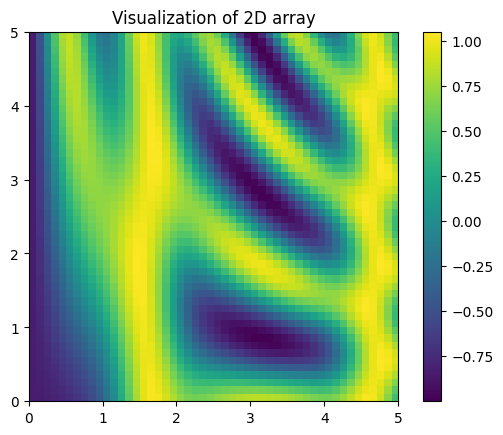

In [24]:
# Importing Matplotlib and plotting
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar()
plt.title('Visualization of 2D array')